In [4]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
import math
import random
import functions
import hybrid_ann
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('lynx.csv')
data = df.iloc[:, -1].values

serie_normal = functions.normalizar_serie(data)
serie_lags = functions.gerar_janelas(tam_janela = 5, serie = serie_normal)
X_train, y_train, X_test, y_test = functions.split_serie_with_lags(serie = serie_lags, perc_train = 0.8, perc_val = 0)

In [3]:
model = hybrid_ann.Hybrid_ANN(m = 5)

# c = np.zeros(2)
# best_mse = np.inf
# best_weight = []
# for c1 in [0.5, 1.0, 1.5, 2.0, 2.5, 3.0]:
# 	for c2 in [0.5, 1.0, 1.5, 2.0, 2.5, 3.0]:
# 		model.fit_MPSO(X = X_train, y = y_train, d= 30,
# 			c1 = c1, c2 = c2 ,w1 = 1.0, w2 = 2.0, maxt = 2000)
# 		y_pred = model.predict(X_test)
# 		temp_mse = mean_squared_error(y_test, y_pred)
# 		if temp_mse < best_mse:
# 			best_mse = temp_mse
# 			best_weight = model.weight[:]
# 			c[0] = c1
# 			c[1] = c2

# print('Best MSE:',best_mse,'c1:',c[0],'c2:',c[1])

model.fit_MPSO(X = X_train, y = y_train, d= 30,
	c1i = 1.0, c1f = 2.0, c2i = 1.0, c2f = 2.0, maxt = 2000)
y_pred = model.predict(X_test)
# print('Prediction:', y_pred)
# print('Test:', y_test)

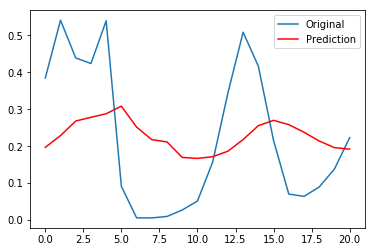

In [5]:
plt.plot(y_test, label = 'Original')
plt.plot(y_pred, label = 'Prediction', color = 'red')
plt.legend()